#### <center>Determinantes de ingreso

#### Hito 1

#### Preliminares

####  Aspectos (Librerías)

In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
from sklearn.preprocessing import PolynomialFeatures as polynom
from sklearn.linear_model import LinearRegression as linreg
from sklearn.pipeline import make_pipeline
import statsmodels.formula.api as smf
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn')


import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score


from funciones_1 import*

#### Consideraciones

#### Data Frame

In [88]:
df = pd.read_csv('income-db.csv')

#### Hito 2

In [89]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [90]:
len(df.axes[0]) # Número de filas

48842

#### Inspección de variables

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [92]:
#Variables categoricas

variables_insp(df)


 workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

 education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

 marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

 occupation
Prof-specialty       6172
Craft-repair         6

In [93]:
# Existen varias variables categoricas que se deben transformar, incluyendo la variable objetivo

#### Inspección del vector objetivo

In [94]:
# La opción con menos datos es mayor a 50K, esto significa que se estudiará la probabilidad de ganar un salario mayor a 50K


df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [95]:
# Primero se procede a limpiar la información de la base. Se ha encontrado el valor ? en algunas de las columnas, estos valores
# las filas que contengan este valor serán removidos de la base.

In [96]:
df=df.replace({"?": np.nan})

In [97]:
variables_insp(df)


 workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

 education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

 marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

 occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6

In [98]:
## ELiminamos los NaN, es decir las filas que tengan NA. Con este cambio nos quedan 284 filas con información.
df=df.dropna()

In [99]:
len(df.axes[0]) ## Con este cambio nos quedan 45222 filas con información.

45222

In [100]:
#Según el resumen de opciones de cada variable categoricas son

In [101]:
var_categoricas(df)

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [102]:
# La recodificación de estas variables se realizó de la siguiente manera

In [103]:
# occupation 
# white-collar ← Prof-specialty, Exec-managerial, Adm-clerical, Sales, Tech-support.
# blue-collar ← Craft-repair, Machine-op-inspct, Transport-moving, Handlers-cleaners, Farming-fishing, Protective-serv, Priv-house-serv.
# others ← Other-service, Armed-Forces.

#df['collars'] = np.where((df['occupation'] == 'Prof-specialty') | (df['occupation'] == 'Exec-managerial') | (df['occupation'] == 'Adm-clerical') | (df['occupation'] == 'Sales') | (df['occupation'] == 'Tech-support'),'collars', 'white-collar')
df.loc[df['occupation'] == 'Other-service','collars']='others'
df.loc[df['occupation'] == 'Armed-Forces','collars']='others'
df.loc[df['occupation'] == 'Prof-specialty','collars']='white_collar'
df.loc[df['occupation'] == 'Exec-managerial','collars']='white_collar'
df.loc[df['occupation'] == 'Adm-clerical','collars']='white_collar'
df.loc[df['occupation'] == 'Tech-support','collars']='white_collar'
df.loc[df['occupation'] == 'Sales','collars']='white_collar'

df.loc[df['occupation'] == 'Craft-repair','collars']='blue_collar'
df.loc[df['occupation'] == 'Machine-op-inspct','collars']='blue_collar'
df.loc[df['occupation'] == 'Transport-moving','collars']='blue_collar'
df.loc[df['occupation'] == 'Handlers-cleaners','collars']='blue_collar'
df.loc[df['occupation'] == 'Farming-fishing','collars']='blue_collar'
df.loc[df['occupation'] == 'Protective-serv','collars']='blue_collar'
df.loc[df['occupation'] == 'Priv-house-serv','collars']='blue_collar'



In [104]:
df['collars'].value_counts()

white_collar    24360
blue_collar     16040
others           4822
Name: collars, dtype: int64

In [105]:
#workclass debe recodificarse como workclass_recod :
#federal-gov ← Federal-gov.
# state-level-gov ← State-gov, Local-gov.
# self-employed ← Self-emp-inc, Self-emp-not-inc
# unemployed ← Never-worked, Without-pay.

df.loc[df['workclass'] == 'Federal-gov','workclass_recod']='federal_gov'
df.loc[df['workclass'] == 'State-gov','workclass_recod']='state_level_gov'
df.loc[df['workclass'] == 'Local-gov','workclass_recod']='state_level_gov'
df.loc[df['workclass'] == 'Self-emp-inc','workclass_recod']='self_employed'
df.loc[df['workclass'] == 'Self-emp-not-inc','workclass_recod']='self_employed'
df.loc[df['workclass'] == 'Never-worked','workclass_recod']='unemployed'
df.loc[df['workclass'] == 'Without-pay','workclass_recod']='unemployed'

#Se crea categoria private, ya que no está en indicaciones
df.loc[df['workclass'] == 'Private','workclass_recod']='private'


In [106]:
df['workclass_recod'].value_counts()

private            33307
self_employed       5442
state_level_gov     5046
federal_gov         1406
unemployed            21
Name: workclass_recod, dtype: int64

In [107]:
#education debe recodificarse como educ_recod 
# preschool ← Preschool
# elementary-school ← 1st-4th, 5th-6th
# high-school ← 7th-8th, 9th, 10th,11th, 12th, HS-grad
# college ← Assoc-voc, Assoc-acdm, Some-college
# university ← Bachelors, Masters, Prof-school, Doctorate.

df.loc[df['education'] == 'Preschool','educ_recod']='preschool'
df.loc[df['education'] == '1st-4th','educ_recod']='elementary_school'
df.loc[df['education'] == '5th-6th','educ_recod']='elementary_school'
df.loc[df['education'] == '10th','educ_recod']='high_school'
df.loc[df['education'] == '11th','educ_recod']='high_school'
df.loc[df['education'] == '12th','educ_recod']='high_school'
df.loc[df['education'] == '7th-8th','educ_recod']='high_school'
df.loc[df['education'] == '9th','educ_recod']='high_school'
df.loc[df['education'] == 'HS-grad','educ_recod']='high_school'


df.loc[df['education'] == 'Assoc-voc','educ_recod']='college'
df.loc[df['education'] == 'Assoc-acdm','educ_recod']='college'
df.loc[df['education'] == 'Some-college','educ_recod']='college'
df.loc[df['education'] == 'Bachelors','educ_recod']='university'
df.loc[df['education'] == 'Masters','educ_recod']='university'
df.loc[df['education'] == 'Prof-school','educ_recod']='university'
df.loc[df['education'] == 'Doctorate','educ_recod']='university'

In [108]:
df['educ_recod'].value_counts()

high_school          19701
college              13365
university           11413
elementary_school      671
preschool               72
Name: educ_recod, dtype: int64

In [109]:
# marital-status debe recodificarse como civstatus 
# married ← Married-civ-spouse, Married-spouse-absent, Married-AF-spouse.
# divorced ← Divorced.
# separated ← Separated.
# widowed ← Widowed.

df.loc[df['marital-status'] == 'Married-civ-spouse','civstatus']='married'
df.loc[df['marital-status'] == 'Married-spouse-absent','civstatus']='married'
df.loc[df['marital-status'] == 'Married-AF-spouse','civstatus']='married'

df.loc[df['marital-status'] == 'Divorced','civstatus']='divorced'

df.loc[df['marital-status'] == 'Separated','civstatus']='separated'

df.loc[df['marital-status'] == 'Widowed','civstatus']='widowed'
# Se crea categoría Never-married, ya que no está en las indicaciones

df.loc[df['marital-status'] == 'Never-married','civstatus']='never_married'

In [110]:
df['civstatus'].value_counts()

married          21639
never_married    14598
divorced          6297
separated         1411
widowed           1277
Name: civstatus, dtype: int64

In [111]:
variables_insp(df)


 workclass
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64

 education
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int64

 marital-status
Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: marital-status, dtype: int64

 occupation
Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5

In [112]:
#native-country debe recodificarse como region donde cada país debe
#asignarse a uno de los 5 continentes.

#America= United-States, Mexico, Puerto-Rico, Canada, El-Salvador, Cuba, , Dominican-Republic, Guatemala, Nicaragua
# peru, ecuador, Honduras, 
#Caribe, Haiti, Jamaica, Trinadad&Tobago
# Asia: Philippines, India, China, Japan, Vietnam, Taiwan, Thailand, Cambodia, Laos
# Europa: Germany, England, Italy, Portugal, Poland, Greece, France, Ireland, Greece, Yugoslavia, Scotland, Hungary, Holand-Netherlands


In [113]:
# Se borran las filas con los siguientes valores: native-country=South, Columbia y Hong.
# Son valores poco precisos 

df = df.drop(df[df['native-country']=='Columbia'].index)
df = df.drop(df[df['native-country']=='South'].index)


In [114]:
len(df.axes[0])

45039

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45039 entries, 0 to 48841
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45039 non-null  int64 
 1   workclass        45039 non-null  object
 2   fnlwgt           45039 non-null  int64 
 3   education        45039 non-null  object
 4   educational-num  45039 non-null  int64 
 5   marital-status   45039 non-null  object
 6   occupation       45039 non-null  object
 7   relationship     45039 non-null  object
 8   race             45039 non-null  object
 9   gender           45039 non-null  object
 10  capital-gain     45039 non-null  int64 
 11  capital-loss     45039 non-null  int64 
 12  hours-per-week   45039 non-null  int64 
 13  native-country   45039 non-null  object
 14  income           45039 non-null  object
 15  collars          45039 non-null  object
 16  workclass_recod  45039 non-null  object
 17  educ_recod       45039 non-null

In [116]:
df.loc[df['native-country'] == 'United-States','region']='america'
df.loc[df['native-country'] == 'Outlying-US(Guam-USVI-etc)','region']='america'
df.loc[df['native-country'] ==  'Mexico' ,'region']='america'
df.loc[df['native-country'] == 'Puerto-Rico','region']='america'
df.loc[df['native-country'] == 'Canada' ,'region']='america'
df.loc[df['native-country'] == 'El-Salvador' ,'region']='america'
df.loc[df['native-country'] == 'Cuba' ,'region']='america'
df.loc[df['native-country'] == 'Dominican-Republic' ,'region']='america'
df.loc[df['native-country'] == 'Guatemala' ,'region']='america'
df.loc[df['native-country'] == 'Nicaragua' ,'region']='america'
df.loc[df['native-country'] == 'Peru' ,'region']='america'
df.loc[df['native-country'] == 'Ecuador' ,'region']='america'
df.loc[df['native-country'] == 'Honduras','region']='america'

df.loc[df['native-country'] == 'Haiti' , 'region'] ='caribe'
df.loc[df['native-country'] =='Jamaica', 'region'] ='caribe' 
df.loc[df['native-country'] =='Trinadad&Tobago', 'region'] ='caribe'


df.loc[df['native-country'] =='Germany', 'region'] ='europa'
df.loc[df['native-country'] =='England', 'region'] ='europa'
df.loc[df['native-country'] =='Italy', 'region'] ='europa'
df.loc[df['native-country'] =='Poland', 'region'] ='europa'
df.loc[df['native-country'] =='France', 'region'] ='europa'
df.loc[df['native-country'] =='Ireland', 'region'] ='europa'
df.loc[df['native-country'] =='Greece', 'region'] ='europa'
df.loc[df['native-country'] =='Yugoslavia', 'region'] ='europa'
df.loc[df['native-country'] =='Scotland', 'region'] ='europa'
df.loc[df['native-country'] =='Hungary', 'region'] ='europa'
df.loc[df['native-country'] =='Holand-Netherlands', 'region'] ='europa'

df.loc[df['native-country'] =='Philippines', 'region'] ='asia'
df.loc[df['native-country'] =='India', 'region'] ='asia'
df.loc[df['native-country'] =='China', 'region'] ='asia'
df.loc[df['native-country'] =='Japan', 'region'] ='asia'
df.loc[df['native-country'] =='Vietnam', 'region'] ='asia'
df.loc[df['native-country'] =='Taiwan', 'region'] ='asia'
df.loc[df['native-country'] =='Thailand', 'region'] ='asia'
df.loc[df['native-country'] =='Cambodia', 'region'] ='asia'
df.loc[df['native-country'] =='Laos', 'region'] ='asia'
df.loc[df['native-country'] =='Hong', 'region'] ='asia'


In [117]:
df['region'].value_counts()

america    43173
asia         874
europa       676
caribe       198
Name: region, dtype: int64

In [118]:
#income debe recodificarse de forma binaria. (>50K menos datos)
df['income'] = np.where(df['income'] == '>50K', 1, 0)

In [119]:
# Esto significa que se estudiará la probabilidad de ganar un salario mayor a 50K
df['income'].value_counts()

0    33853
1    11186
Name: income, dtype: int64

In [120]:
# Variables 'relationship','race', 'gender. 
#Como ya se tiene variables como region y civstatus;  'relationship','race' se binarizarán igual que gender

df['Not_in_family'] = np.where(df['relationship'] == 'Not-in-family', 1, 0)
df['Not_white'] = np.where(df['race'] != 'White', 1, 0)
df['Female'] = np.where(df['gender'] == 'Female', 1, 0)

In [121]:
df['Not_in_family'].value_counts()

0    33375
1    11664
Name: Not_in_family, dtype: int64

In [122]:
df['Not_white'].value_counts()

0    38829
1     6210
Name: Not_white, dtype: int64

In [123]:
df['Female'].value_counts()

0    30414
1    14625
Name: Female, dtype: int64

In [124]:
# Ahora se convertiran las variables recodificadas en variables dummies
#se usa , drop_first=True para evitar colinealidad


In [125]:
a=pd.get_dummies(df['collars'], drop_first=True, dtype=np.int64)
b=pd.get_dummies(df['workclass_recod'], drop_first=True, dtype=np.int64)
c=pd.get_dummies(df['educ_recod'], drop_first=True, dtype=np.int64)
d=pd.get_dummies(df['civstatus'], drop_first=True, dtype=np.int64)
e=pd.get_dummies(df['region'], drop_first=True, dtype=np.int64)

In [126]:
df2=pd.concat ([ df, a,b,c,d,e ],  axis = 1 )

#### Hito 3

In [127]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45039 entries, 0 to 48841
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45039 non-null  int64 
 1   workclass          45039 non-null  object
 2   fnlwgt             45039 non-null  int64 
 3   education          45039 non-null  object
 4   educational-num    45039 non-null  int64 
 5   marital-status     45039 non-null  object
 6   occupation         45039 non-null  object
 7   relationship       45039 non-null  object
 8   race               45039 non-null  object
 9   gender             45039 non-null  object
 10  capital-gain       45039 non-null  int64 
 11  capital-loss       45039 non-null  int64 
 12  hours-per-week     45039 non-null  int64 
 13  native-country     45039 non-null  object
 14  income             45039 non-null  int32 
 15  collars            45039 non-null  object
 16  workclass_recod    45039 non-null  objec

In [128]:
df2.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'collars', 'workclass_recod', 'educ_recod', 'civstatus',
       'region', 'Not_in_family', 'Not_white', 'Female', 'others',
       'white_collar', 'private', 'self_employed', 'state_level_gov',
       'unemployed', 'elementary_school', 'high_school', 'preschool',
       'university', 'married', 'never_married', 'separated', 'widowed',
       'asia', 'caribe', 'europa'],
      dtype='object')

In [129]:
# Sacamos las variables categoricas y la variable objetivo

In [130]:
df_object = df2.select_dtypes(include=[object])

In [131]:
column_names = list(df_object.columns)
column_names

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'collars',
 'workclass_recod',
 'educ_recod',
 'civstatus',
 'region']

In [132]:
df2=df2.drop(column_names, axis=1)

In [133]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45039 entries, 0 to 48841
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                45039 non-null  int64
 1   fnlwgt             45039 non-null  int64
 2   educational-num    45039 non-null  int64
 3   capital-gain       45039 non-null  int64
 4   capital-loss       45039 non-null  int64
 5   hours-per-week     45039 non-null  int64
 6   income             45039 non-null  int32
 7   Not_in_family      45039 non-null  int32
 8   Not_white          45039 non-null  int32
 9   Female             45039 non-null  int32
 10  others             45039 non-null  int64
 11  white_collar       45039 non-null  int64
 12  private            45039 non-null  int64
 13  self_employed      45039 non-null  int64
 14  state_level_gov    45039 non-null  int64
 15  unemployed         45039 non-null  int64
 16  elementary_school  45039 non-null  int64
 17  high_school 

In [134]:
df2=df2.rename(columns={"hours-per-week": "hours_per_week", "capital-gain": "capital_gain", "educational-num":"educational_num","capital-loss":"capital_loss", })

In [135]:
# Se implementa el modelo, removemos income

In [136]:
columnas = list(df2.columns)
columnas
columnas.remove('income')

sum_var = "+".join(columnas)
sum_var

'age+fnlwgt+educational_num+capital_gain+capital_loss+hours_per_week+Not_in_family+Not_white+Female+others+white_collar+private+self_employed+state_level_gov+unemployed+elementary_school+high_school+preschool+university+married+never_married+separated+widowed+asia+caribe+europa'

In [137]:
m1_logit = smf.logit('income ~ '+sum_var, df2).fit()

Optimization terminated successfully.
         Current function value: 0.336432
         Iterations 12


In [138]:
# Se depura el modelo manteniendo las variables con significancia estadística al 5%

In [139]:
m1_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.400     
Dependent Variable:   income           AIC:              30359.1384
Date:                 2022-11-23 05:09 BIC:              30594.4511
No. Observations:     45039            Log-Likelihood:   -15153.   
Df Model:             26               LL-Null:          -25246.   
Df Residuals:         45012            LLR p-value:      0.0000    
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       12.0000                                      
-------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
-------------------------------------------------------------------
Intercept         -8.0845   0.2206 -36.6510 0.0000  -8.5169 -7.6522
age                0.0256   0.0013  19.1637 0.0000   0.0230  0.0282
fnlwgt             0.0000   0.0000   5.1754 0.0000   0.0000  0.0000
educational_num    0.2833   0.0160  17.6547 0.0000   0.2518  0.3147
capital_gain       0.0003   0.0000  37.2903 0.0000   0.0003  0.0003
capital_loss       0.0007   0.0000  21.6024 0.0000   0.0006  0.0007
hours_per_week     0.0294   0.0013  22.3975 0.0000   0.0268  0.0320
Not_in_family      0.2910   0.0603   4.8251 0.0000   0.1728  0.4091
Not_white         -0.2144   0.0538  -3.9811 0.0001  -0.3199 -0.1088
Female            -0.2790   0.0420  -6.6407 0.0000  -0.3613 -0.1966
others            -0.7066   0.0864  -8.1814 0.0000  -0.8759 -0.5374
white_collar       0.6271   0.0354  17.7134 0.0000   0.5577  0.6965
private           -0.4518   0.0747  -6.0504 0.0000  -0.5982 -0.3055
self_employed     -0.7817   0.0819  -9.5392 0.0000  -0.9423 -0.6211
state_level_gov   -0.5291   0.0832  -6.3562 0.0000  -0.6923 -0.3660
unemployed        -1.7177   0.7897  -2.1752 0.0296  -3.2654 -0.1700
elementary_school  0.1347   0.2364   0.5699 0.5688  -0.3286  0.5980
high_school       -0.0516   0.0466  -1.1076 0.2680  -0.1430  0.0397
preschool         -4.7255   5.9767  -0.7907 0.4291 -16.4396  6.9886
university         0.0781   0.0606   1.2875 0.1979  -0.0408  0.1969
married            2.3581   0.0673  35.0483 0.0000   2.2262  2.4900
never_married     -0.5147   0.0689  -7.4675 0.0000  -0.6498 -0.3796
separated         -0.0110   0.1321  -0.0829 0.9339  -0.2699  0.2480
widowed            0.0040   0.1264   0.0317 0.9747  -0.2438  0.2518
asia              -0.1044   0.1112  -0.9389 0.3478  -0.3222  0.1135
caribe            -0.1987   0.2701  -0.7357 0.4619  -0.7282  0.3307
europa             0.1261   0.1089   1.1582 0.2468  -0.0873  0.3395
===================================================================

"""

In [140]:
#Se filtra por p value menor a 0.05
var_sig = 'age+Female+fnlwgt+educational_num+capital_gain+capital_loss+hours_per_week+Not_in_family+Not_white+Not_white+others+white_collar+private+self_employed+unemployed+married+never_married+state_level_gov'
m1_logit_dep = smf.logit('income ~ '+var_sig, df2).fit()

Optimization terminated successfully.
         Current function value: 0.336537
         Iterations 8


In [141]:
m1_logit_dep.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.400     
Dependent Variable: income           AIC:              30350.5924
Date:               2022-11-23 05:09 BIC:              30507.4675
No. Observations:   45039            Log-Likelihood:   -15157.   
Df Model:           17               LL-Null:          -25246.   
Df Residuals:       45021            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept        -8.2911   0.1562 -53.0797 0.0000 -8.5972 -7.9849
age               0.0257   0.0013  19.4969 0.0000  0.0231  0.0283
Female           -0.2798   0.0418  -6.6879 0.0000 -0.3619 -0.1978
fnlwgt            0.0000   0.0000   5.2497 0.0000  0.0000  0.0000
educational_num   0.3024   0.0072  41.9889 0.0000  0.2883  0.3165
capital_gain      0.0003   0.0000  37.3259 0.0000  0.0003  0.0003
capital_loss      0.0007   0.0000  21.5968 0.0000  0.0006  0.0007
hours_per_week    0.0294   0.0013  22.3952 0.0000  0.0268  0.0320
Not_in_family     0.2923   0.0602   4.8579 0.0000  0.1744  0.4102
Not_white        -0.2418   0.0485  -4.9810 0.0000 -0.3370 -0.1467
others           -0.7056   0.0863  -8.1722 0.0000 -0.8748 -0.5363
white_collar      0.6337   0.0351  18.0565 0.0000  0.5649  0.7025
private          -0.4526   0.0746  -6.0702 0.0000 -0.5987 -0.3064
self_employed    -0.7828   0.0818  -9.5661 0.0000 -0.9431 -0.6224
unemployed       -1.7424   0.7900  -2.2057 0.0274 -3.2907 -0.1941
married           2.3587   0.0622  37.9468 0.0000  2.2368  2.4805
never_married    -0.5079   0.0648  -7.8407 0.0000 -0.6349 -0.3810
state_level_gov  -0.5269   0.0831  -6.3381 0.0000 -0.6899 -0.3640
=================================================================

"""

In [58]:
# El Pseudo R^2 de ambos modelos son muy similares (explican la varianza del modelo en aproximadamente un 40%)
#Todas las variables del modelo depurado siguen siendo significativas

In [142]:
# El aporte de cada variable significativa es:
m1_logit_dep.params

Intercept         -8.291052e+00
age                2.567002e-02
Female            -2.798489e-01
fnlwgt             7.255330e-07
educational_num    3.024284e-01
capital_gain       3.222672e-04
capital_loss       6.621970e-04
hours_per_week     2.941212e-02
Not_in_family      2.923025e-01
Not_white         -2.418260e-01
others            -7.055516e-01
white_collar       6.337346e-01
private           -4.525575e-01
self_employed     -7.827535e-01
unemployed        -1.742422e+00
married            2.358664e+00
never_married     -5.079393e-01
state_level_gov   -5.269212e-01
dtype: float64

In [143]:
coeficientes = m1_logit_dep.params

In [144]:
def invlogit(x):
    return 1 / (1+np.exp(-x))

In [145]:
coeficientes.map(lambda x: \
                 round(invlogit(m1_logit_dep.params['Intercept'] + x), 4))

Intercept          0.0000
age                0.0003
Female             0.0002
fnlwgt             0.0003
educational_num    0.0003
capital_gain       0.0003
capital_loss       0.0003
hours_per_week     0.0003
Not_in_family      0.0003
Not_white          0.0002
others             0.0001
white_collar       0.0005
private            0.0002
self_employed      0.0001
unemployed         0.0000
married            0.0026
never_married      0.0002
state_level_gov    0.0001
dtype: float64

In [63]:
# Entonces de acuerdo a lo obtenido podemos ver que en casi todas las variables, la adicion de una unidad incrementa 0.01% - 0.05% 
#la probabilida  de ganar un salario mayor a 50K, la variable married aporta un 0.26% a la probabilidad.

# Variables como  educacion, inversiones( capital_gain/loss), horas trabajadas, ocupacion; que tienen que ver
# directamente con la preparación academica y oportunidades son esperables como regresoras en este estudio

# Variables como estado civil, color de piel y edad y género también son esperables que generen cambios en la probabilidad de income,
# sin embargo pueden indicar la importancia de ciertos arquetipos sociales para obtener mejores oportunidades laborales o derechamente 
# mayores ingresos. 

In [146]:
# Según apreciamos la adición de la variable married aporta en un 0.24% a la probabilidad de ganar mas que 50k.
# Se observa el modelo con esta variable como regresora

m2_logit = smf.logit('income ~ married', df2).fit()

Optimization terminated successfully.
         Current function value: 0.456928
         Iterations 7


In [147]:
m2_logit.summary2()
#El porcentaje explicativo del modelo es menor a los modelos anteriores, esto debido a que no considera variables inportantes 
#para explicar la variable income

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.185     
Dependent Variable: income           AIC:              41163.1515
Date:               2022-11-23 05:11 BIC:              41180.5821
No. Observations:   45039            Log-Likelihood:   -20580.   
Df Model:           1                LL-Null:          -25246.   
Df Residuals:       45037            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
             Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept   -2.6351    0.0261  -100.9196  0.0000  -2.6862  -2.5839
married      2.4190    0.0295    82.0309  0.0000   2.3612   2.4768
=================================================================

"""

In [148]:
# Se calcula la probabilidad que la persona reciba un sueldo mayor a 50k esté casada

def concise_summary(mod, print_fit=True):
    """Resumen de estadistico del modelo"""
    #guardamos los parámetros asociados a estadísticas de ajuste
    fit = pd.DataFrame({'Statistics': mod.summary2().tables[0][2][2:],
    'Value': mod.summary2().tables[0][3][2:]})
    # guardamos los parámetros estimados por cada regresor.
    estimates = pd.DataFrame(mod.summary2().tables[1])
    # imprimir fit es opcional
    if print_fit is True:
        print("\nGoodness of Fit statistics\n", fit)
        print("\nPoint Estimates\n\n", estimates)
    # solicitemos las características del modelo
concise_summary(m2_logit)


Goodness of Fit statistics
         Statistics       Value
2             BIC:  41180.5821
3  Log-Likelihood:     -20580.
4         LL-Null:     -25246.
5     LLR p-value:      0.0000
6           Scale:      1.0000
7                             

Point Estimates

               Coef.  Std.Err.           z  P>|z|    [0.025    0.975]
Intercept -2.635051  0.026110 -100.919604    0.0 -2.686226 -2.583875
married    2.418963  0.029488   82.030866    0.0  2.361167  2.476760


In [149]:
m = round(invlogit(-2.635051+2.418963), 4)
print("La probabilidad de un individuo casado gane más de 50k como salario: ",
    m)

La probabilidad de un individuo casado gane más de 50k como salario:  0.4462


In [150]:
nm = round(invlogit(-2.635051), 4)
print("La probabilidad de un individuo que no esté casado gane más de 50k como salario: ",
    nm)

La probabilidad de un individuo que no esté casado gane más de 50k como salario:  0.0669


#### Hito 4

In [151]:
#Se genera subconjuntos de entrenamiento y pruebas, separando el 33% de la muestra en el conjunto de pruebas.
#Se utiliza las variables del modelo depurado.
#También se eliminaran las variables que puedan tener la misma información para trabajar con las variables necesarias
# y evitar esl sobre ajuste ( estas son fnlwgt,capital_loss, others, unemployed, never_married,private,Not_in_family)

In [152]:
df2

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week,income,Not_in_family,Not_white,Female,...,high_school,preschool,university,married,never_married,separated,widowed,asia,caribe,europa
0,25,226802,7,0,0,40,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,28,336951,12,0,0,40,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,44,160323,10,7688,0,40,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5,34,198693,6,0,0,30,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
48838,40,154374,9,0,0,40,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
48839,58,151910,9,0,0,40,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
48840,22,201490,9,0,0,20,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [153]:
y=df2['income']

In [154]:
X=df2.drop(columns=['income','Not_in_family','fnlwgt','capital_loss', 'others', 'unemployed', 'never_married','private','elementary_school','high_school','preschool','university','separated','widowed','asia','caribe','europa'])

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1511)

In [156]:
# estandarizamos la matriz de entrenamiento
X_train_std = StandardScaler().fit_transform(X_train)

# estandarizamos la matriz de pruebas ( se usa para generar la prediccion de las clases)
X_test_std = StandardScaler().fit_transform(X_test)


In [157]:
default_model = LogisticRegression(random_state=1511).fit(X_train_std, y_train)

In [158]:
default_model.coef_

array([[ 0.38887808,  0.76986169,  2.19443735,  0.38386814, -0.09920096,
        -0.14635906,  0.37518023, -0.12790311, -0.04648494,  1.22548868]])

In [159]:
default_model

LogisticRegression(random_state=1511)

In [160]:
#predicción de las clases
yhat = default_model.predict(X_test_std)

In [161]:
#predicción de probabilidad.
yhat_prob = default_model.predict_proba(X_test_std)

In [162]:
#exactitud de nuestro modelo
m1_acc = accuracy_score(y_test, yhat)
round(m1_acc,2)


0.84

In [163]:
#La exactitud informa que el modelo tiene un desempeño de un 0.34% superior que una predicción azarosa.

In [164]:
#Reporte las métricas de precisión, recall y f1 para ambas clases.

In [165]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11168
           1       0.72      0.58      0.64      3695

    accuracy                           0.84     14863
   macro avg       0.79      0.75      0.77     14863
weighted avg       0.83      0.84      0.83     14863



In [166]:
#Se observa que F1 tiene una media armónica para la clase 1 de 0.64 y para la clase 0 de 0.90

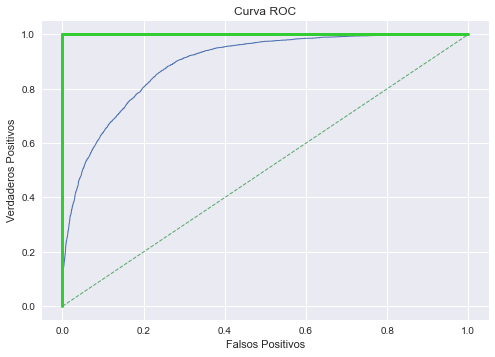

In [167]:
# reestimamos los valores predichos de nuestro modelo para obtener la probabilidad entre 0 y 1.
yhat2 = default_model.predict_proba(X_test_std)[:, 1]

# generamos los objetos de roc_cruve
false_positive, true_positive, threshold = roc_curve(y_test, yhat2)
# Plot ROC curve
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] ,
c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');

In [86]:
#área bajo la curva
round(roc_auc_score(y_test, yhat2),2)

0.89

In [93]:
#Se observa que la curva ROC tiene una capacidad predictiva adecuada, ya que se posiciona por sobre la
#bisectriz, lo que significa que la tasa de verdaderos positivos es mayor que la tasa de falsos
#positivos. Además tiende a acercarse a la esquina superior izquierda del gráfico.

#EL área bajo la curva tiene un valor de .89, esto significa que el modelo tiene un desempeño de 39% superior a un mecanismo
#de clasificación aleatoria.

#El modelo es adecuado